In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_hastie_10_2
import os

In [2]:
from sklearn.preprocessing import StandardScaler as ss

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.decomposition import PCA

In [6]:
data = pd.read_csv("breastcancer.csv")

In [7]:
data.shape

(569, 32)

In [8]:
data.head()

,id,diag,radimean,textmean,perimean,areamean,smoothnessmean,compactnessmean,concavitymean,concavepointsmean,...,radworst,textworst,perimeterworst,areaworst,smoothnessworst,compactnessworst,concavityworst,concavepointsworst,symmworst,fractaldimensionworst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df=data.drop(['id'],axis=1)

In [10]:
X = df.loc[: , 'radimean':'fractaldimensionworst']
y = df.loc[:, 'diag']

In [11]:
scale = ss()
X = scale.fit_transform(X)

In [12]:
pca = PCA()
out = pca.fit_transform(X)
out.shape

(569, 30)

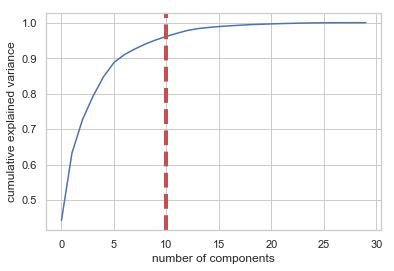

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.442720,0.442720
1,0.632432,0.189712
2,0.726364,0.093932
3,0.792385,0.066021
4,0.847343,0.054958
5,0.887588,0.040245
6,0.910095,0.022507
7,0.925983,0.015887
8,0.939879,0.013896
9,0.951569,0.011690


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
pca_test = PCA(n_components=30)
pca_test.fit(X)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

In [14]:
final_data = out[:, :10]

In [15]:
final_data.shape

(569, 10)

In [16]:
final_data[:5,:]

array([[ 9.19283683,  1.94858307, -1.12316616,  3.6337309 , -1.19511012,
         1.41142445,  2.15936987, -0.39840723, -0.15711836, -0.87740188],
       [ 2.3878018 , -3.76817174, -0.52929269,  1.11826386,  0.62177498,
         0.02865635,  0.01335809,  0.24098846, -0.71190482,  1.10699494],
       [ 5.73389628, -1.0751738 , -0.55174759,  0.91208267, -0.1770859 ,
         0.54145215, -0.66816648,  0.09737374,  0.02406564,  0.4542754 ],
       [ 7.1229532 , 10.27558912, -3.23278955,  0.15254703, -2.9608784 ,
         3.05342182,  1.4299107 ,  1.05956524, -1.40543967, -1.11697527],
       [ 3.93530207, -1.94807157,  1.38976673,  2.94063935,  0.5467474 ,
        -1.22649464, -0.93621255,  0.63637606, -0.26380546,  0.37770447]])

In [17]:
pcdf = pd.DataFrame( data =  final_data,
                    columns = ['pc1', 'pc2','pc3', 'pc4','pc5','pc6','pc7','pc8','pc9','pc10'])

In [18]:
pcdf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704


In [20]:
pcdf['target'] = data['diag'].map({"M":1,"B":0})

In [21]:
pcdf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,target
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,NaN
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,NaN
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,NaN
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,NaN
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,NaN


In [22]:
pcdf["target"].fillna('1',limit=350, inplace = True)
pcdf["target"].fillna('0',limit=219, inplace = True)
pcdf


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,target
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,1
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,1
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,1
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,1
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,1
5,2.380247,3.949929,-2.934877,0.941037,-1.056042,-0.451039,0.490445,-0.165444,-0.133473,-0.530431,1
6,2.238883,-2.690031,-1.639913,0.149340,0.040360,-0.128948,-0.301567,0.083698,-0.080025,0.219143,1
7,2.143299,2.340244,-0.871947,-0.127043,-1.427437,-1.257039,0.974100,-0.653338,0.248184,1.000586,1
8,3.174924,3.391813,-3.119986,-0.601297,-1.522290,0.559545,-0.215104,-0.687341,0.511924,0.029187,1
9,6.351747,7.727174,-4.341916,-3.375202,1.710263,-0.723909,2.519840,0.365149,-0.717397,-1.165631,1


In [23]:
X = pcdf.loc[: , 'pc1':'pc10']
y = pcdf.loc[:,'target']

In [24]:
X.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704


In [25]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: object

In [26]:
y.tail()

564    0
565    0
566    0
567    0
568    0
Name: target, dtype: object